### Plotting Circles for Mohr's Circle

Getting the basics figured out here.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Decoding the Stress Tensor: Cauchy Stress Tensor

I need to provide some description here of the meaning of the terms in the 2D stress tensor below. In a planar stress problem we are looking at the normal stress on the vertical (V) and horizontal (H) surfaces are $\sigma_x$ and $\sigma_y$ respectively and the shear stress $\tau$ are the terms in the 2D stress tensor. The assumed (+) directions are shown. The matrix should be symmetric around the diagonal axis.

<img src="https://raw.githubusercontent.com/smithrockmaker/ENGR213/main/images/stressCubeM.png" width="200"/>

<img src="https://raw.githubusercontent.com/smithrockmaker/ENGR213/main/images/stressTensorM.png" width="600"/>


$$\large \begin{matrix}\sigma_H & \tau_H \\ \tau_V & \sigma_V\end{matrix} = \begin{matrix}\sigma_{xx} & \tau_{xy} \\ \tau_{xy} & \sigma_{yy}\end{matrix}$$

**Note of Caution:** The labeling of the H and V points seems to vary from author to author. For this reason I have also labeled them as 'top' of stress cube and 'side' of stress cube (global coordinates). Hopefully this reconciles the variation in the language.

In [43]:
"""Plot Mohr circle for a 2D tensor"""
S = np.array([[4., 4.0],[4.0, -2.]])
S11 = S[0,0] # sigma xx
S12 = S[0,1] # tau xy
S21 = S[1,0] # - tau xy
S22 = S[1,1] # sigma yy
S

array([[ 4.,  4.],
       [ 4., -2.]])

### Define Circle Parameters:

Center and radius

In [54]:
# linear array of angle for plotting - NOT plane angles
angle = np.linspace( 0 , 2 * np.pi , 150 ) 
center = [(S11 + S22)/2.0, 0.0]
radius = np.sqrt((S11 - S22)**2/4.0 + S12**2)
circleX = center[0] + radius * np.cos( angle ) 
circleY = center[1] + radius * np.sin( angle ) \

# Sort out plotting limits
circleXmin = center[0] - radius
circleXmax = center[0] + radius

# where is circle on grid - span y axis, left of y axis, right of y axis

limScale = 0.3 
if circleXmin > 0.:
    leftLim = -1.
    rightLim = circleXmax + limScale*radius
else:
    if circleXmax < 0.:
        rightLim = 1.
        leftLim = circleXmin - limScale*radius
    else:
        leftLim = circleXmin - limScale*radius
        rightLim = circleXmax + limScale*radius

# End points of line on Mohrs Circle
pointSize = 20. # set possible size of point on plot
pointH = [S11, -S21] # right side of stress cube
pointV = [S22, S12] # top of stress cube
endX = [pointV[0], pointH[0]]
endY = [pointV[1], pointH[1]]
circleVpt = [pointV[0]-center[0], pointV[1]]
circleHpt = [pointH[0]-center[0], pointH[1]]

# angles on Mohr's circle
twoThetaP = np.arctan(S11/(pointH[0]-center[0]))
twoThetaPdeg = round((180./np.pi)*twoThetaP,3)
ThetaPdeg = twoThetaPdeg/2.
        
# develop label strings
labelCenter = str(round(center[0],3))
labelNormalY = str(round(pointH[0],3))
labelNormalX = str(round(pointV[1],3))
labelInitShear = str(round(pointV[1],3))
labelInitNx = str(round(pointH[0],3))
labelInitNy = str(round(pointV[0],3))
labelMaxShear = str(round(radius,3))
labelMaxNormal = str(round(center[0]+radius,3))
labelMinNormal = str(round(center[0]-radius,3))
labeltwoThetaP = str(round(twoThetaPdeg,2))
labelThetaP = str(round(ThetaPdeg,2))
    
# debug tools
print('leftLim', leftLim)
print('rightLim', rightLim)
print('radius', radius)
print('center', center)
print('label center', labelCenter)
print('initial shear', pointV[0])
print('H', pointH)
print('V', pointV)
print('H in circle', circleHpt)
print('V', pointV)
print('two theta P', twoThetaP)
print('two theta P (deg)', twoThetaPdeg)

leftLim -5.5
rightLim 7.5
radius 5.0
center [1.0, 0.0]
label center 1.0
initial shear -2.0
H [4.0, -4.0]
V [-2.0, 4.0]
two theta P 0.9272952180016122
two theta P (deg) 53.13


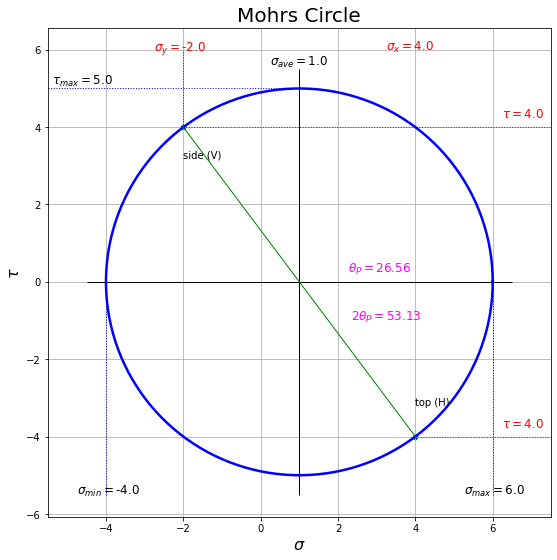

In [59]:
fig1, ax1 = plt.subplots()
ax1.plot(circleX, circleY, color = 'blue', linewidth = 2.5)

ax1.scatter(pointH[0], pointH[1], marker = 'o', s = pointSize, color = 'green')
ax1.scatter(pointV[0], pointV[1], marker = 'o', s = pointSize, color = 'green')
ax1.plot(endX, endY, linewidth = 1.,color = 'green')

# a way to set labels
plt.xlabel(r"$\sigma$", fontsize = 16)
plt.ylabel(r"$\tau$", fontsize = 16)
plt.title('Mohrs Circle', fontsize = 20)

# set limits for good utility
ax1.set_xlim([leftLim,rightLim])
ax1.set_aspect('equal') # set aspect ratio so circle looks like a cirle - cool!

# reference lines of various sorts
# average normal stress (center of circle)
ax1.vlines(center[0], -1.1*radius, +1.1*radius,
         color = 'black', linestyle = '-',
         linewidth = 1. , label = "average normal stress")
ax1.hlines(0, center[0]-1.1*radius, center[0]+1.1*radius,
         color = 'black', linestyle = '-',
         linewidth = 1. , label = "0 shear")

# max shear stress
ax1.hlines(radius, leftLim, center[0],
         color = 'blue', linestyle = ':',
         linewidth = 1. , label = "max shear stress")
# max normal stress
ax1.vlines(center[0]+radius, -1.1*radius, 0,
         color = 'blue', linestyle = ':',
         linewidth = 1. , label = "max normal stress")
# min normal stress
ax1.vlines(center[0]-radius,  -1.1*radius, 0,
         color = 'blue', linestyle = ':',
         linewidth = 1. , label = "min normal stress")
# inital stress state
ax1.hlines(pointV[1], pointV[0], rightLim,
         color = 'red', linestyle = ':',
         linewidth = 1. , label = "shear stress")
ax1.hlines(pointH[1], pointH[0], rightLim,
         color = 'red', linestyle = ':',
         linewidth = 1. , label = "shear stress")
ax1.vlines(pointV[0], pointV[1], 1.2*radius,
         color = 'red', linestyle = ':',
         linewidth = 1. , label = "shear stress")
ax1.vlines(pointV[0], pointV[1], 1.2*radius,
         color = 'red', linestyle = ':',
         linewidth = 1. , label = "shear stress")

# Labels for various important points.
# Starting with those points that don't shift
plt.text(center[0]-(0.15*radius), 1.12*radius, r"$\sigma_{ave} = $"+labelCenter, fontsize= 12.)
plt.text(leftLim+.1, radius+.1, r"$\tau_{max} = $"+labelMaxShear, fontsize= 12.)
plt.text(center[0]+radius-(0.15*radius), -1.1*radius, r"$\sigma_{max} = $"+labelMaxNormal, fontsize= 12.)
plt.text(center[0]-radius-(0.15*radius), -1.1*radius, r"$\sigma_{min} = $"+labelMinNormal, fontsize= 12.)
# starting stress state
plt.text(center[0]+radius+(0.05*radius), pointV[1]+(0.05*radius), r"$\tau = $"+labelInitShear, fontsize= 12., color='red')
plt.text(center[0]+radius+(0.05*radius), pointH[1]+(0.05*radius), r"$\tau = $"+labelInitShear, fontsize= 12., color='red')
plt.text(pointV[0]-(0.15*radius), 1.2*radius, r"$\sigma_{y} = $"+labelInitNy, fontsize= 12., color='red')
plt.text(pointH[0]-(0.15*radius), 1.2*radius, r"$\sigma_{x} = $"+labelInitNx, fontsize= 12., color='red')

# principle axes and rotation
plt.text(center[0]+radius/4, 0.05*radius, r"$\theta_{P} = $"+labelThetaP, fontsize= 12., color='magenta')
plt.text(center[0]+S11/3, 0.25*pointH[1], r"$2\theta_{P} = $"+labeltwoThetaP, fontsize= 12., color='magenta')

# ..moving to those that depend on where V and H are located
#plt.text(leftLim+.1, radius+.1, r"$\tau_{max} = $"+labelMax, fontsize= 12.)


setSm = 0.8
setLg = 1.1
plt.text(pointV[0], setSm*pointV[1], "side (V)", fontsize= 10.)
plt.text(pointH[0], setSm*pointH[1], "top (H)", fontsize= 10.)

fig1.set_size_inches(10, 9)
ax1.grid()

#plt.legend(loc= 2)
plt.show()

#print('label', offsetEnds*pointH[0])
#print('Hx', pointH[0])